## Image Operation

사용되는 메소드 : `cv2.add()`, `cv2.addWeighted`

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

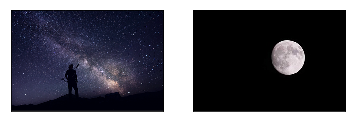

In [2]:
galaxy = cv2.imread("../Data/galaxy.png")
moon = cv2.imread("../Data/moon.jpg")

b, g, r = cv2.split(galaxy)
galaxy = cv2.merge((r, g, b))

b, g, r = cv2.split(moon)
moon = cv2.merge((r, g, b))

images = [galaxy, moon]

for i in range(2):
    plt.subplot(1,2,i+1), plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
    
plt.show()

### 두 이미지를 OpenCV로 더하기

saturation 연산으로 한계 값을 초과하면 모두 특정 값으로 정해놓는다.

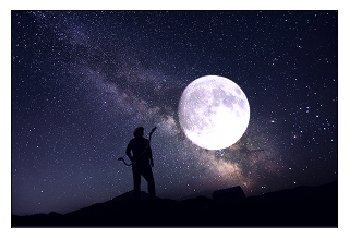

In [3]:
img_cvadd = cv2.add(galaxy, moon)
plt.imshow(img_cvadd)
plt.xticks([])
plt.yticks([])
plt.show()

### 두 이미지를 numpy로 더하기

modulo 연산으로 256을 초과하는 경우에 256으로 나눈 값을 적용한다.

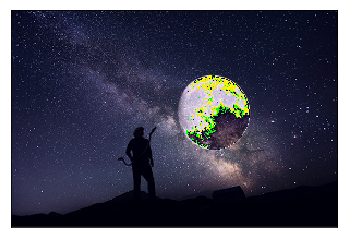

In [4]:
img_cvadd = galaxy + moon
plt.imshow(img_cvadd)
plt.xticks([])
plt.yticks([])
plt.show()

### 이미지 블렌딩

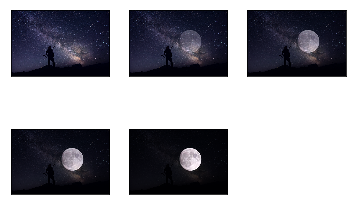

In [9]:
for i in range(5):
    img = cv2.addWeighted(galaxy, float(100 - i * 20) * 0.01, moon, i * 25 * 0.01,0)
    plt.subplot(2,3,i+1), plt.imshow(img,'gray')
    plt.xticks([]),plt.yticks([])
    
plt.show()

### 비트연산

특정 영역을 추출할 수 있다.

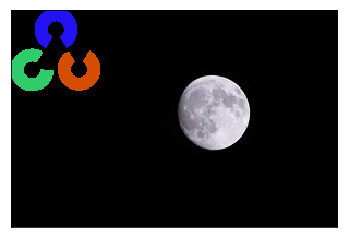

In [17]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

logo = cv2.imread('../Data/opencv.png')
moon = cv2.imread('../Data/moon.jpg')

rows, cols, channels = logo.shape
roi = moon[0:rows, 0:cols]

# Gray 필터링, Binary 이미지 변환을 통해 mask를 얻는다.
# mask는 배경인 부분이 검정색

moongray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(moongray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# cv2.bitwise_and 연산자는 둘 다 검정색이 아닌 경우에 값을 받는다.
# 따라서 검정색인 부분의 이미지는 제거된다.
logo_fg = cv2.bitwise_and(logo, logo, mask=mask)
moon_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# 2개의 이미지를 합치면 logo의 바탕은 제거되고 logo 이미지 부분만 합쳐짐.
dst = cv2.add(logo_fg, moon_bg)

#합쳐진 이미지를 원본 이미지에 추가.
moon[0:rows, 0:cols] = dst

plt.imshow(moon)
plt.xticks([]), plt.yticks([])
plt.show()

### BGR -> Gray

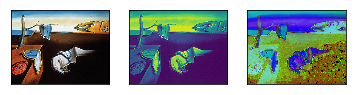

In [43]:
clock = cv2.imread("../Data/time.jpg")
b, g, r = cv2.split(clock)
clock = cv2.merge([r, g, b])

clockgray = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY)
clockHSV = cv2.cvtColor(clock, cv2.COLOR_BGR2HSV)

images = [clock, clockgray, clockHSV]

for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### 이미지 임계 처리

cv2.threshold(image, thredhold, maxvalue, type)

type : 

- cv2.THRESH_BINARY

- cv2.THRESH_BINARY_INV

- cv2.THRESH_TRUNC

- cv2.THRESH_TOZERO

- cv2.THRESH_TOZERO_INV

임계값 보다 작으면 0(검정), 크면 255(흰색)이 된다.

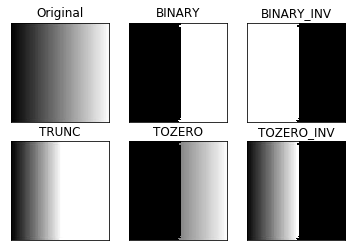

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../Data/gradient.png',0)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### 작은 영역별로 임계 처리

cv2.adaptiveThreshold(image, maxValue, adaptiveMethod, thresholdType, clockSize, C)

Adaptive Method

- cv2.ADAPTIVE_THRESH_MEAN_C

- cv2.ADAPTIVE_THRESH_GAUSSIAN_C :

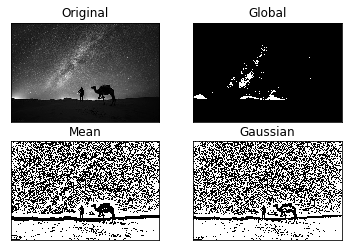

In [2]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('../Data/desert.jpg',0)
# img = cv2.medianBlur(img,5)

ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)



th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,15,2)

titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Otsu의 이진화

이진화를 사용할 때 시행착오를 겪어야 하지만,

bimodal 이미지를 사용한다면 적절한 임계값을 계산할 수 있다.

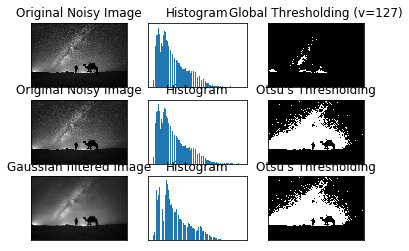

In [64]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread('../Data/desert.jpg',0)

# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img,(5,5),0)

ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2), plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3), plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

In [4]:
img.shape

(200, 300)